<a href="https://colab.research.google.com/github/prathamadh/eve/blob/Binayak/usingroboflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="vbVrgdwZya33R5lPJUuQ")
project = rf.workspace().project("cauli-vmxtk")
dataset = project.version(1).download("yolov5")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to cauli-1 in yolov5pytorch:: 100%|██████████| 56/56 [00:00<00:00, 2072.56it/s]


In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

/usr/local/lib/python3.8/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
requirements: YOLOv5 requirements "gitpython" "ipython" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB

  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
!cd /content/drive/MyDrive/yolocauli/ && python train.py --img 320 --batch 16 --epochs 500 --data /content/drive/MyDrive/yolocauli/cauli-1/data.yaml --weights yolov5s.pt --workers 2

In [ ]:
%cd /content/cauli-1
%cp -av /content/cauli-1 /content/drive/MyDrive/yolocauli

loading custom model

In [4]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/yolocauli/runs/train/exp10/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-1-16 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients
Adding AutoShape... 


In [11]:
img ='/content/drive/MyDrive/yolocauli/cauli-1/train/images/cauliflower8_jpeg.rf.c3b4919980c35c03abfef307f75a357e.jpg'
results=model(img)
results.print()


image 1/1: 640x640 (no detections)
Speed: 17.9ms pre-process, 12.5ms inference, 0.5ms NMS per image at shape (1, 3, 640, 640)


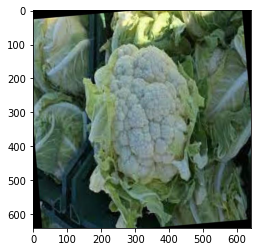

In [12]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()